In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


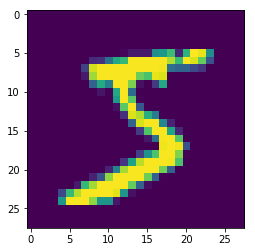

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(Convolution2D(16, 1,1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #12
#model.add(Dropout(0.13))

model.add(Convolution2D(16, 3, 3, activation='relu')) #10

model.add(Convolution2D(16, 3, 3, activation='relu')) #8
model.add(MaxPooling2D(pool_size=(2, 2))) #4
#model.add(Dropout(0.13))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        272       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=40, verbose=1,validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 120s 2ms/step - loss: 0.1935 - acc: 0.9389 - val_loss: 0.0542 - val_acc: 0.9825
Epoch 2/40
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0621 - acc: 0.9808 - val_loss: 0.0413 - val_acc: 0.9868
Epoch 3/40
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0468 - acc: 0.9859 - val_loss: 0.0390 - val_acc: 0.9876
Epoch 4/40
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0383 - acc: 0.9881 - val_loss: 0.0329 - val_acc: 0.9896
Epoch 5/40
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0318 - acc: 0.9903 - val_loss: 0.0382 - val_acc: 0.9866
Epoch 6/40
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0281 - acc: 0.9911 - val_loss: 0.0403 - val_acc: 0.9870
Epoch 7/40
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0252 - acc: 0.9920 - val_loss: 0.0320 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
print(score)

[0.05997535286572206, 0.9905]


In [0]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[4.59347663e-19 1.35021126e-18 1.12557910e-15 2.71703796e-15
  3.36355552e-28 5.41133061e-24 1.25135517e-32 1.00000000e+00
  3.41631603e-20 8.24544731e-15]
 [4.89165597e-25 9.58292313e-16 1.00000000e+00 3.58806548e-18
  3.70451700e-27 3.45043637e-34 3.43124974e-17 7.41346407e-19
  3.45226939e-17 1.86163022e-30]
 [1.86262439e-15 1.00000000e+00 9.81848804e-12 1.09052432e-15
  2.82749135e-09 1.43771747e-14 7.38256637e-14 2.58905564e-09
  4.24027220e-12 3.74895292e-14]
 [1.00000000e+00 1.17308572e-30 1.64005865e-15 5.37513207e-20
  9.07705999e-21 1.30974397e-17 1.10865206e-09 8.03614419e-24
  3.86745427e-11 5.30825180e-14]
 [3.25786026e-26 1.33616832e-31 1.47727122e-25 1.99540335e-29
  1.00000000e+00 5.57036182e-24 4.32988186e-26 8.71917116e-29
  1.00310902e-17 2.06234396e-14]
 [1.11997682e-15 1.00000000e+00 2.35888115e-10 1.09808723e-17
  4.23793356e-09 2.20407630e-18 6.17367648e-13 2.44719855e-10
  3.47697305e-12 1.01721454e-13]
 [1.98966625e-35 2.63976194e-21 1.52043820e-23 1.15519716e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

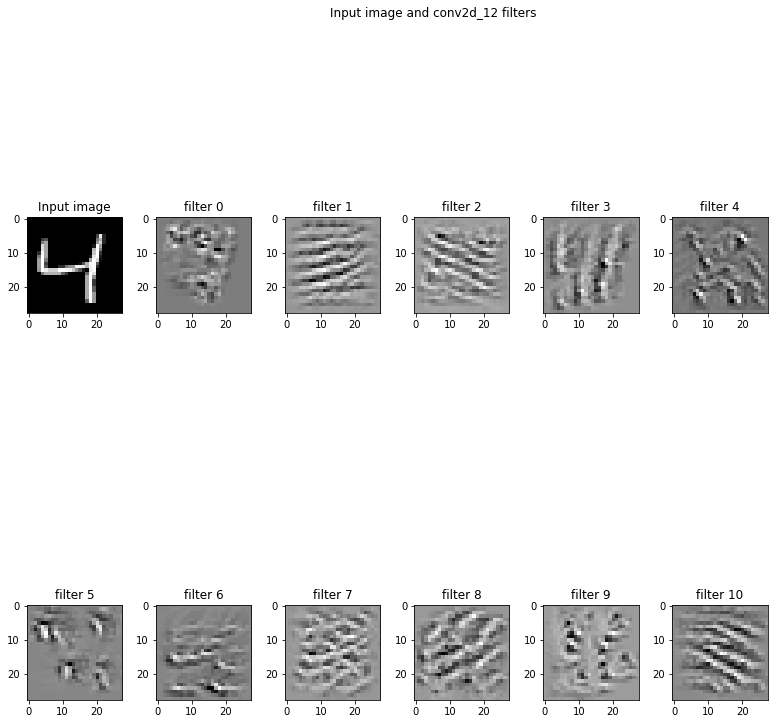

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_12'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()